# Random Forest


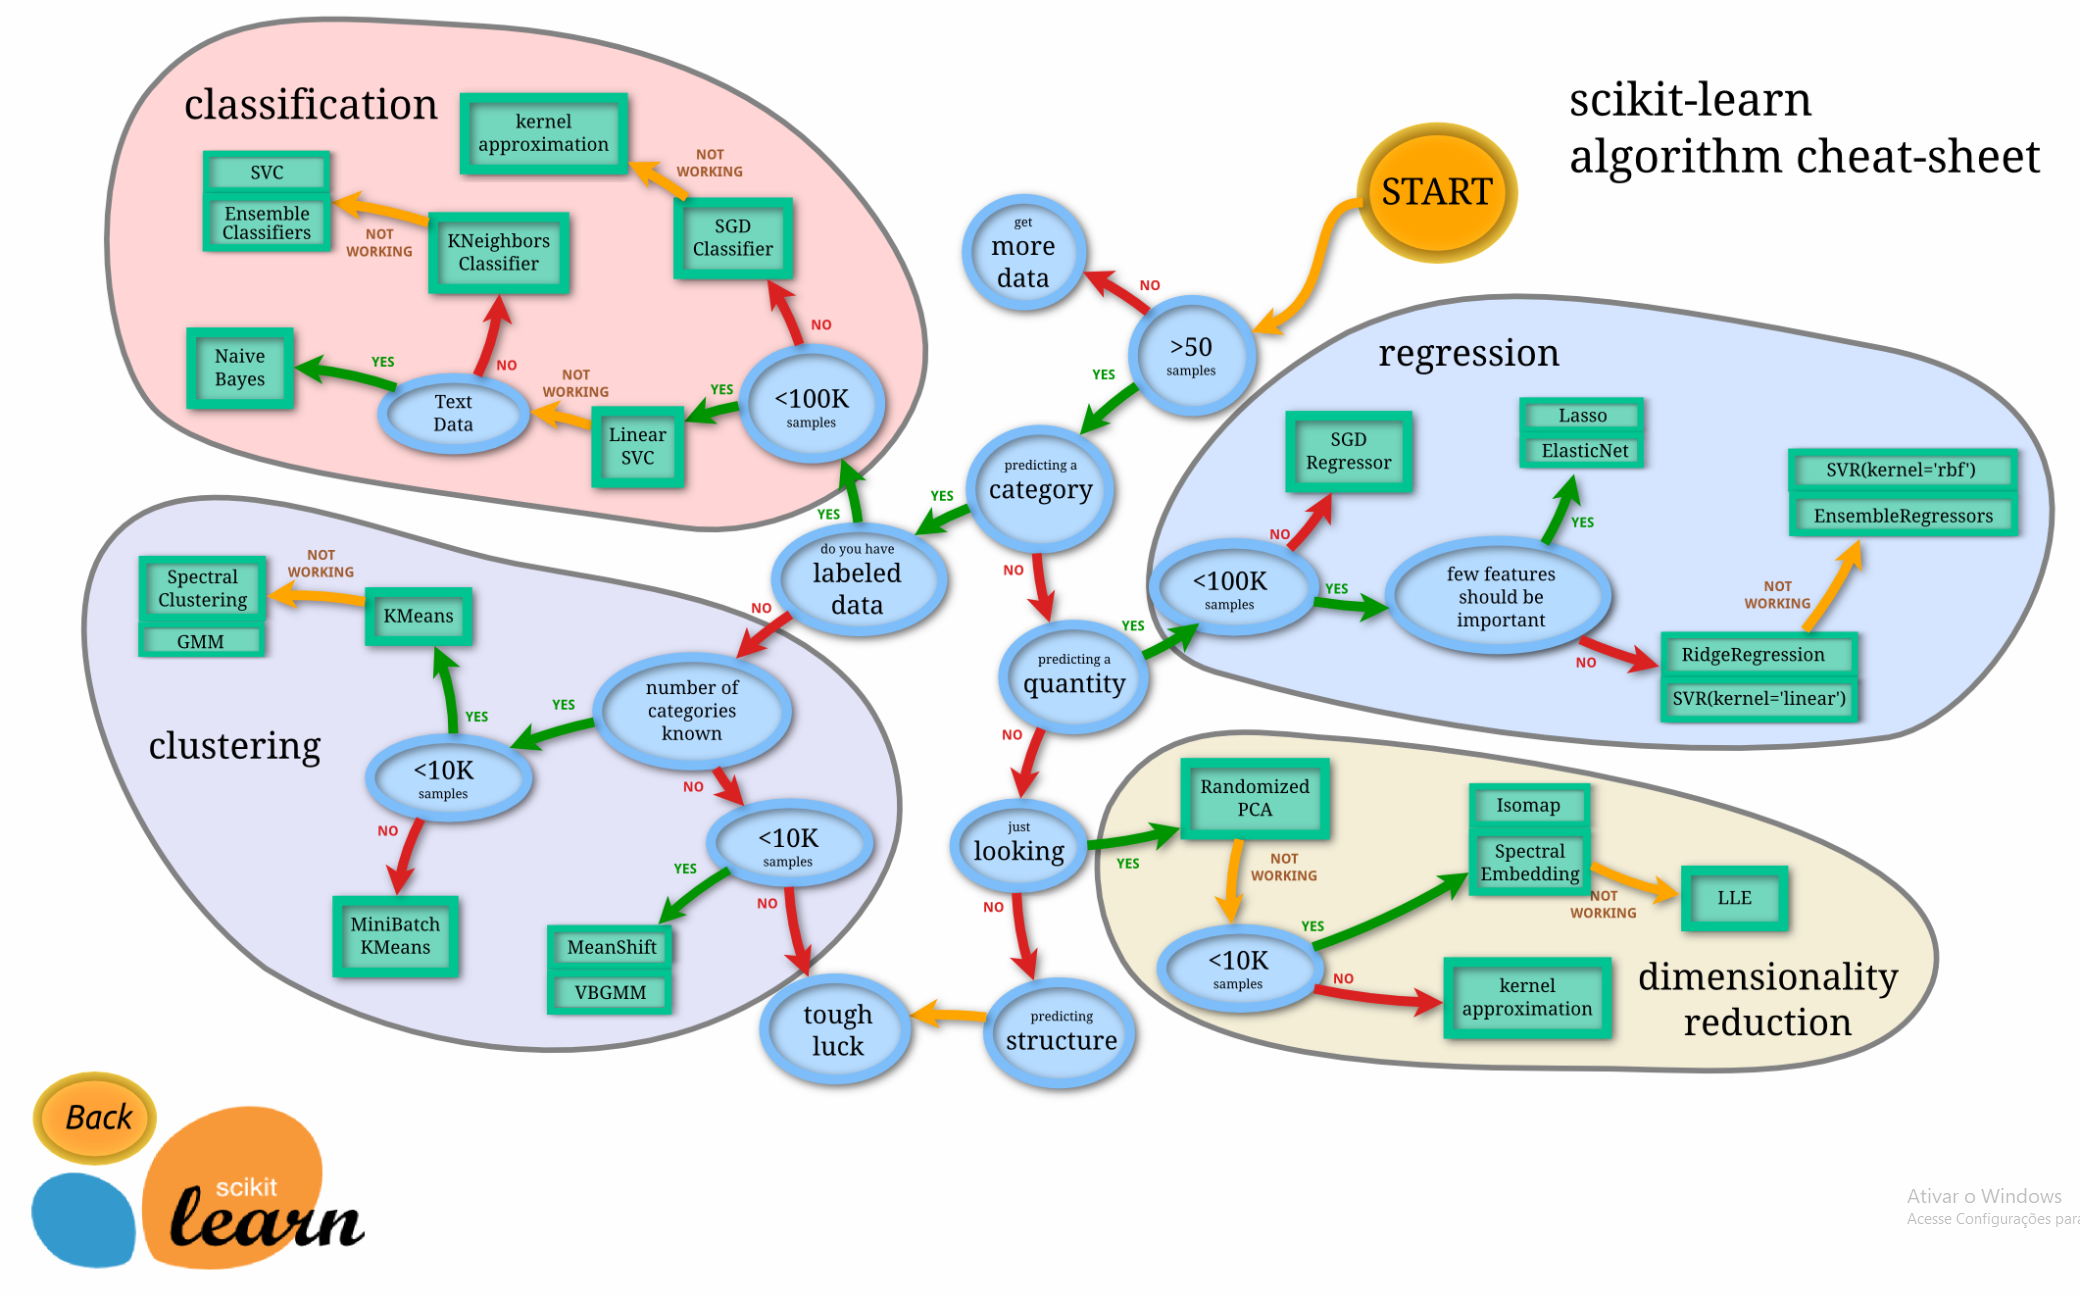



---





# Checklist Trabalho



Uso de um algoritmo de Machine Learning: DecisionTree/Random Forest

Uso da divisão do dataset train/test: Foi feita a divisão de 80% pra treino e 20% pra teste.

Uso de Feature Scaling: Usado.

Uso de técnicas de Categórico para Numérico: Não houve necessidade de get dummies ou one hot coding, os dados já estavam tratados.

Uso de Feature Selection: usado, a partir da visualização da matriz de correlação.

Uso do Learning Curve/ Analise under/overfiting: verificada o learning curve a partir do f1_score, não foi verificado overfitting no teste.

Nota sobre o balanceamento do dataset: o dataset tem o target balanceado em 50/50.

Uso de métrica de avaliação, diferença entre Regressão e Classificação: o target é o class_label, que é phishing ou não. Portanto, a métrica de avaliação se dá por classificação.



---



# 1 Início da Análise: Utilizado Random Forest

## Importando Bibliotecas


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

### Leitura dos dados e definição do target

#####Target Definido = Class Label
#####1 -> Fishing / 0 -> Legítimo

In [ ]:
df = pd.read_csv('Dataset/Phishing_Legitimate_full.csv', index_col=False)
df.head()


,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


#### Visualização de dataframe
####Foi verificado que o mesmo não tem dados nulos, dessa forma não será preciso, fazer limpeza dos dados.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

#### Criação de matriz de correlação
####Etapa importante para verificarmos qual a correlação das outra features com o target que foi definido.

In [ ]:
pd.set_option('display.max_columns', 50)
corr_mat = df.corr(method='pearson')
corr_mat

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
id,1.000000,-0.238066,0.027976,-0.234909,-0.046967,0.231091,-0.107170,0.009916,-0.084148,0.024811,0.042614,0.047733,-0.002700,-0.050400,-0.072220,0.065735,0.050651,-0.174331,-0.063880,0.081811,NaN,-0.109106,-0.012361,-0.015069,-0.023122,-0.214784,-0.127501,-0.245957,-0.010172,-0.085581,-0.274347,0.073639,0.096961,0.130747,-0.266362,-0.427392,0.007209,-0.041793,0.052504,0.305298,0.204099,-0.081004,0.000481,0.063732,-0.010836,-0.020932,-0.169502,-0.068570,0.465757,-0.866025
NumDots,-0.238066,1.000000,0.507992,0.079202,0.277380,-0.198769,0.093034,0.011425,0.109508,0.038068,0.022616,0.169283,0.255404,0.371642,0.211384,0.024590,-0.064631,0.158447,0.238473,0.009897,NaN,0.289482,0.000579,0.263039,0.002462,0.305793,0.164434,0.116726,-0.042685,0.050103,0.072103,-0.088802,-0.009604,-0.031990,0.033516,0.177703,-0.002490,0.050992,-0.031698,-0.117766,-0.117210,0.045291,-0.012244,-0.343927,-0.151756,0.047821,0.032276,0.035586,-0.153835,0.294111
SubdomainLevel,0.027976,0.507992,1.000000,0.007277,0.098579,-0.050018,0.246368,-0.005845,0.009518,-0.023593,-0.006003,-0.029706,-0.031766,-0.018054,0.051744,-0.044628,0.076544,-0.103343,0.522014,-0.019847,NaN,0.605218,-0.039307,-0.026179,0.012070,0.158365,0.019471,-0.063890,-0.079427,-0.033224,-0.040207,-0.020441,0.002922,0.029142,0.106631,-0.061013,-0.023893,0.133530,-0.010968,-0.027739,-0.001061,0.026432,-0.008830,-0.679687,-0.086943,0.059584,-0.030790,0.093623,-0.034866,0.043132
PathLevel,-0.234909,0.079202,0.007277,1.000000,0.390456,0.090503,0.027626,-0.005891,0.127291,0.015719,-0.043529,-0.140303,-0.104935,0.007947,0.233024,0.058466,0.250091,0.017895,0.014693,0.261468,NaN,0.013025,0.612786,-0.085555,0.020221,0.121805,0.087328,0.018365,-0.038542,0.082978,0.099618,0.007842,-0.012905,-0.033858,0.085679,0.028918,-0.004003,0.049318,0.014823,-0.061813,0.000701,-0.027880,-0.002279,-0.024815,-0.399710,-0.000903,0.040901,0.064222,-0.095786,0.229450
UrlLength,-0.046967,0.277380,0.098579,0.390456,1.000000,0.437313,0.111980,-0.003425,0.058233,0.350756,0.184947,0.476699,0.466038,0.227029,0.637872,0.036667,0.230698,0.094311,0.120201,0.227722,NaN,0.162770,0.643924,0.649204,0.000162,0.223492,0.026183,-0.095430,-0.045713,0.061362,-0.004030,0.048207,0.015086,0.023152,-0.090563,-0.099667,0.014242,0.087848,0.034980,0.042056,0.033192,-0.053222,-0.036766,-0.133533,-0.800096,0.002019,-0.025366,-0.000860,0.142819,-0.074493
NumDash,0.231091,-0.198769,-0.050018,0.090503,0.437313,1.000000,0.113200,-0.010139,-0.024395,-0.050195,-0.017938,-0.064746,-0.056693,-0.023398,0.121830,0.036594,0.248141,-0.056135,0.056684,0.315989,NaN,0.010045,0.605889,-0.013725,-0.001462,-0.081733,-0.043440,-0.070490,0.116288,0.086994,-0.091292,0.094711,0.077007,0.049723,-0.113173,-0.188701,-0.007831,0.063704,0.092634,0.181687,0.228154,-0.064450,-0.006314,-0.023363,-0.468798,-0.137093,-0.085238,-0.122579,0.184808,-0.372235
NumDashInHostname,-0.107170,0.093034,0.246368,0.027626,0.111980,0.113200,1.000000,-0.004409,-0.018043,-0.035170,-0.021648,-0.042379,-0.036415,-0.008395,0.120447,-0.089577,0.073574,-0.033672,0.542477,0.038602,NaN,0.550247,0.000450,-0.029753,0.065692,0.081098,0.013179,-0.025364,-0.078277,0.004301,0.011456,0.075694,-0.011151,-0.041690,0.177997,-0.019193,-0.009018,0.439129,-0.01

#### Drop de features
####Após visualização de matriz de correlação, foi feito o drop das features importantes como id(index) e target(Class_label), que caso ficassem ocasionaria um overfitting do treino. HttpsInHostname também sofreu drop por não ter correlação com os dados, já que tem o mesmo valor de campo em todas as linhas.

#### Separação entre treino e teste

In [ ]:
X = df.drop(columns=['CLASS_LABEL','HttpsInHostname', 'id'])
y = df['CLASS_LABEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### StandardScaler para padronização

In [ ]:
#uso de padronização Scaling
from sklearn.preprocessing import StandardScaler
X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)

#### Treinamento do  modelo por Random Forest

In [ ]:
modelo = RandomForestClassifier(random_state=42)

modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

#### Resultados da Random Forest

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       988
           1       0.99      0.98      0.98      1012

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



# Utilização de Algoritmo Decision Tree

#1 -> Fishing / #0 -> Legítimo

### Feito leitura dos dados e verificado e definido o target do atual trabalho

#####Target Definido = Class Label
#####1 -> Fishing / 0 -> Legítimo

In [ ]:
#Utilizando modelo 2 Decision Tree
df2 = pd.read_csv('/content/Phishing_Legitimate_full.csv', index_col=False)
df2.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,21,44,0,0,0,0,0.000,0.250000,1,1,0,0,0,0.0,0,0,0,0,0,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,0,2,1,0,41,1,0,0,0,0,0,17,16,103,0,1,0,0.000,0.000000,0,1,0,0,0,0.0,0,0,0,0,0,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,27,24,0,0,0,0,0.375,1.000000,1,1,0,0,0,0.0,0,0,0,0,0,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,22,50,0,0,0,1,1.000,0.095238,1,1,0,0,0,0.0,1,0,0,0,1,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,0,0,0,0,2,1,1,0,0,1,0,10,29,0,0,0,0,1.000,1.000000,0,0,0,1,0,0.0,1,0,0,0,0,1,0,0,1,1,-1,0,-1,-1,1


#### Criando matriz de correlação

In [ ]:
#matriz de correlação
pd.set_option('display.max_columns', 50)
corr_mat = df2.corr(method='pearson')
corr_mat

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
id,1.000000,-0.238066,0.027976,-0.234909,-0.046967,0.231091,-0.107170,0.009916,-0.084148,0.024811,0.042614,0.047733,-0.002700,-0.050400,-0.072220,0.065735,0.050651,-0.174331,-0.063880,0.081811,NaN,-0.109106,-0.012361,-0.015069,-0.023122,-0.214784,-0.127501,-0.245957,-0.010172,-0.085581,-0.274347,0.073639,0.096961,0.130747,-0.266362,-0.427392,0.007209,-0.041793,0.052504,0.305298,0.204099,-0.081004,0.000481,0.063732,-0.010836,-0.020932,-0.169502,-0.068570,0.465757,-0.866025
NumDots,-0.238066,1.000000,0.507992,0.079202,0.277380,-0.198769,0.093034,0.011425,0.109508,0.038068,0.022616,0.169283,0.255404,0.371642,0.211384,0.024590,-0.064631,0.158447,0.238473,0.009897,NaN,0.289482,0.000579,0.263039,0.002462,0.305793,0.164434,0.116726,-0.042685,0.050103,0.072103,-0.088802,-0.009604,-0.031990,0.033516,0.177703,-0.002490,0.050992,-0.031698,-0.117766,-0.117210,0.045291,-0.012244,-0.343927,-0.151756,0.047821,0.032276,0.035586,-0.153835,0.294111
SubdomainLevel,0.027976,0.507992,1.000000,0.007277,0.098579,-0.050018,0.246368,-0.005845,0.009518,-0.023593,-0.006003,-0.029706,-0.031766,-0.018054,0.051744,-0.044628,0.076544,-0.103343,0.522014,-0.019847,NaN,0.605218,-0.039307,-0.026179,0.012070,0.158365,0.019471,-0.063890,-0.079427,-0.033224,-0.040207,-0.020441,0.002922,0.029142,0.106631,-0.061013,-0.023893,0.133530,-0.010968,-0.027739,-0.001061,0.026432,-0.008830,-0.679687,-0.086943,0.059584,-0.030790,0.093623,-0.034866,0.043132
PathLevel,-0.234909,0.079202,0.007277,1.000000,0.390456,0.090503,0.027626,-0.005891,0.127291,0.015719,-0.043529,-0.140303,-0.104935,0.007947,0.233024,0.058466,0.250091,0.017895,0.014693,0.261468,NaN,0.013025,0.612786,-0.085555,0.020221,0.121805,0.087328,0.018365,-0.038542,0.082978,0.099618,0.007842,-0.012905,-0.033858,0.085679,0.028918,-0.004003,0.049318,0.014823,-0.061813,0.000701,-0.027880,-0.002279,-0.024815,-0.399710,-0.000903,0.040901,0.064222,-0.095786,0.229450
UrlLength,-0.046967,0.277380,0.098579,0.390456,1.000000,0.437313,0.111980,-0.003425,0.058233,0.350756,0.184947,0.476699,0.466038,0.227029,0.637872,0.036667,0.230698,0.094311,0.120201,0.227722,NaN,0.162770,0.643924,0.649204,0.000162,0.223492,0.026183,-0.095430,-0.045713,0.061362,-0.004030,0.048207,0.015086,0.023152,-0.090563,-0.099667,0.014242,0.087848,0.034980,0.042056,0.033192,-0.053222,-0.036766,-0.133533,-0.800096,0.002019,-0.025366,-0.000860,0.142819,-0.074493
NumDash,0.231091,-0.198769,-0.050018,0.090503,0.437313,1.000000,0.113200,-0.010139,-0.024395,-0.050195,-0.017938,-0.064746,-0.056693,-0.023398,0.121830,0.036594,0.248141,-0.056135,0.056684,0.315989,NaN,0.010045,0.605889,-0.013725,-0.001462,-0.081733,-0.043440,-0.070490,0.116288,0.086994,-0.091292,0.094711,0.077007,0.049723,-0.113173,-0.188701,-0.007831,0.063704,0.092634,0.181687,0.228154,-0.064450,-0.006314,-0.023363,-0.468798,-0.137093,-0.085238,-0.122579,0.184808,-0.372235
NumDashInHostname,-0.107170,0.093034,0.246368,0.027626,0.111980,0.113200,1.000000,-0.004409,-0.018043,-0.035170,-0.021648,-0.042379,-0.036415,-0.008395,0.120447,-0.089577,0.073574,-0.033672,0.542477,0.038602,NaN,0.550247,0.000450,-0.029753,0.065692,0.081098,0.013179,-0.025364,-0.078277,0.004301,0.011456,0.075694,-0.011151,-0.041690,0.177997,-0.019193,-0.009018,0.439129,-0.01

#### Drop de features/Feature Selection:
####A partir da análise da matriz de correlação, foram tiradas as features padrão (ID, Httpishostname e Class_Label), pelos motivos anteriores já comentaram. Porém, como o teste agora se dará por Decision Tree, a feature selection se dará pela análise da matriz de correlação. Portanto, a partir da correlação entre o Class_label (Target) e todas as outras features, tiraremos as features que menos tem relação com o target.

In [ ]:
#feature selection
X2 = df2.drop(columns=['CLASS_LABEL','HttpsInHostname', 'id','SubdomainLevel','UrlLength','AtSymbol','NumHash','NumNumericChars','DoubleSlashInPath','PctExtResourceUrls','FakeLinkInStatusBar','ImagesOnlyInForm'])
y2 = df2['CLASS_LABEL']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=43)

#### Treinamento do modelo por Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
modelo2 = DecisionTreeClassifier(random_state=43, max_depth=3)
modelo2.fit(X_train2, y_train2)

DecisionTreeClassifier(max_depth=3, random_state=43)

#### Plot da decision tree, com uma max depth de 3.

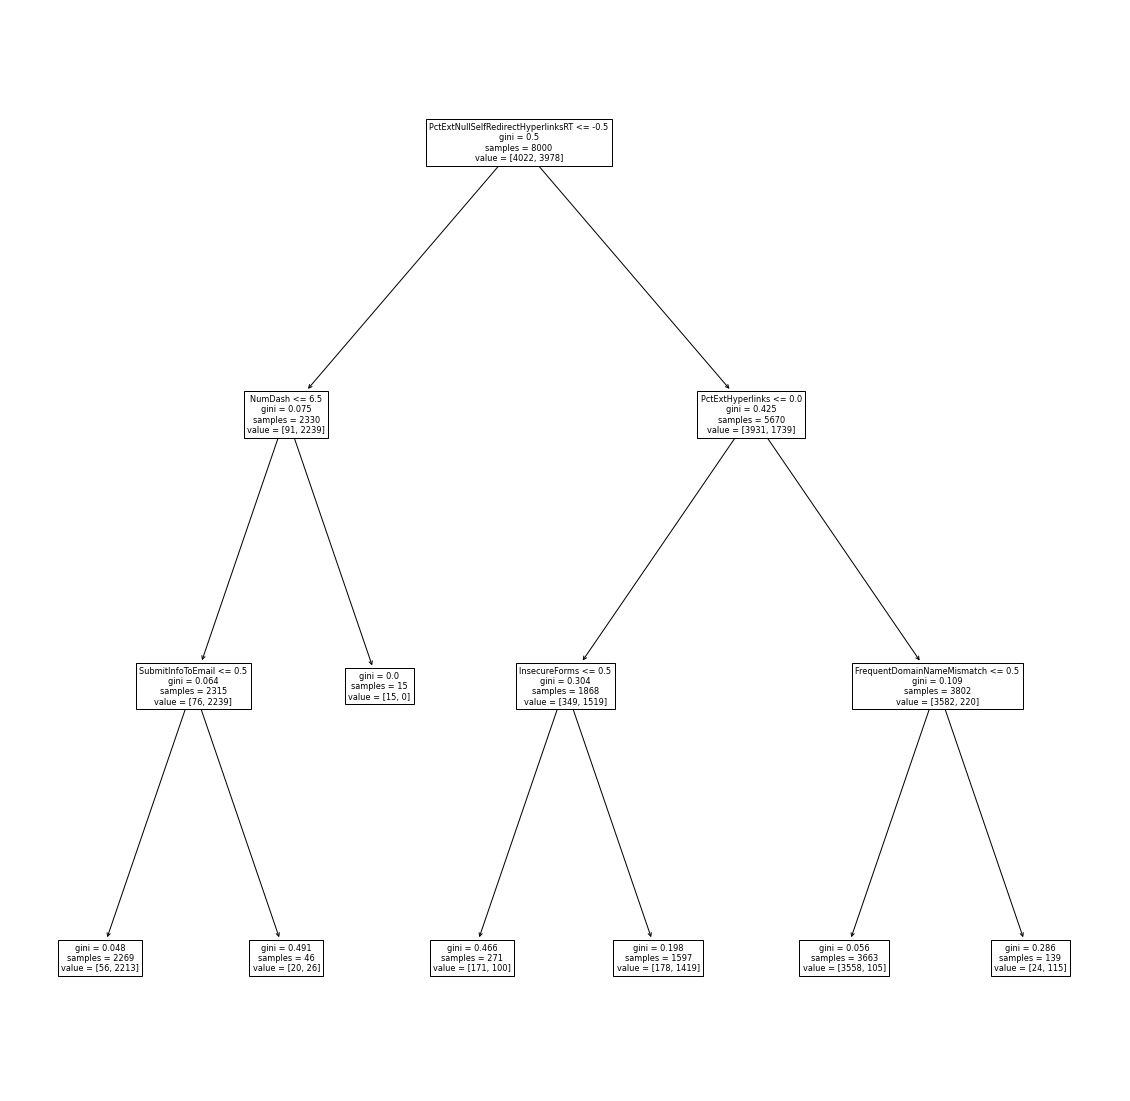

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt

plt.figure(figsize=(20, 20))
tree.plot_tree(modelo2, feature_names=X_train2.columns)
plt.show()

#### Processo de step by step do Learning Curve, para verificar se há ou não overfitting do treinamento do modelo.

In [ ]:
df_selecao = pd.DataFrame(X_train_std, columns=X_train.columns)
df_selecao['y'] = y_train
df_selecao.head()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,y
0,-0.328137,0.568591,-0.696250,-0.877181,-0.580533,-0.255072,-0.019369,-0.115879,-0.289583,-0.116420,-0.335634,-0.242142,-0.047488,-0.185821,0.107265,0.950237,-0.133945,-0.149547,-0.859067,0.638369,-1.037463,-0.349449,-0.029593,-0.296022,-0.246713,-0.271837,-0.662533,-0.448957,0.433591,-0.57889,2.991697,-0.246998,0.153444,-0.524891,-0.074367,-0.122355,-0.074367,-0.382487,-0.721943,-0.185455,-0.175863,0.176012,1.192736,0.725112,-1.530049,1.101409,-0.347514,NaN
1,0.414674,0.568591,-0.162878,-0.907410,-0.580533,-0.255072,-0.019369,-0.115879,-0.289583,1.475647,-0.335634,-0.242142,-0.047488,-0.290458,0.107265,0.950237,-0.133945,-0.149547,1.164053,-0.719469,-0.631794,-0.349449,-0.029593,-0.296022,4.053294,-0.704673,1.574072,2.227387,0.433591,-0.57889,-0.334258,-0.246998,-0.437779,1.905159,-0.074367,-0.122355,-0.074367,-0.382487,-0.721943,-0.185455,-0.175863,0.176012,1.192736,-1.528101,0.394541,-1.556592,0.765866,1.0
2,0.414674,-0.805232,0.370493,-0.514433,-0.580533,-0.255072,-0.019369,-0.115879,-0.289583,-0.116420,-0.335634,-0.242142,-0.047488,0.023452,0.107265,0.950237,-0.133945,-0.149547,-0.859067,-0.225710,-0.266692,-0.349449,-0.029593,-0.296022,-0.246713,-0.704673,-0.497731,2.227387,0.433591,-0.57889,-0.334258,-0.246998,2.754824,-0.524891,-0.074367,-0.122355,-0.074367,-0.382487,-0.721943,-0.185455,-0.175863,0.176012,1.192736,0.725112,0.394541,-0.227591,-1.460893,1.0
3,0.414674,0.568591,-0.696250,0.573810,3.244529,-0.255072,-0.019369,-0.115879,-0.289583,-0.116420,-0.335634,-0.242142,-0.047488,0.860544,0.107265,0.950237,-0.133945,-0.149547,1.164053,-0.349149,1.234283,-0.349449,-0.029593,-0.296022,-0.246713,-0.603227,-0.856661,-0.448957,0.433591,-0.57889,-0.334258,-0.246998,-0.349096,-0.524891,-0.074367,-0.122355,-0.074367,2.614470,-0.721943,-0.185455,-0.175863,0.176012,-1.250769,0.725112,0.394541,1.101409,0.765866,NaN
4,-1.070947,-0.805232,0.370493,0.936558,1.331998,-0.255072,-0.019369,-0.115879,2.433766,-0.116420,0.415015,-0.242142,-0.047488,0.023452,0.107265,0.950237,-0.133945,-0.149547,1.164053,-0.966348,0.544646,1.031877,-0.029593,-0.296022,-0.246713,-0.331697,-0.840105,-0.448957,-2.306321,-0.57889,-0.334258,-0.246998,-0.437779,-0.524891,-0.074367,-0.122355,-0.074367,-0.382487,-0.721943,-0.185455,-0.175863,0.176012,-1.250769,0.725112,0.394541,-0.227591,0.765866,1.0


#### Info da seleção de treino

In [ ]:
df_selecao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 48 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   NumDots                             8000 non-null   float64
 1   SubdomainLevel                      8000 non-null   float64
 2   PathLevel                           8000 non-null   float64
 3   UrlLength                           8000 non-null   float64
 4   NumDash                             8000 non-null   float64
 5   NumDashInHostname                   8000 non-null   float64
 6   AtSymbol                            8000 non-null   float64
 7   TildeSymbol                         8000 non-null   float64
 8   NumUnderscore                       8000 non-null   float64
 9   NumPercent                          8000 non-null   float64
 10  NumQueryComponents                  8000 non-null   float64
 11  NumAmpersand                        8000 no

#### Feito Seleção de Teste

In [ ]:
df_selecao_test = pd.DataFrame(X_test_std, columns=X_test.columns)
df_selecao_test['y'] = y_test
df_selecao_test.head()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,y
0,-1.081327,-0.703588,-0.154238,-0.326283,1.072717,-0.252653,0.0,-0.112509,-0.291827,-0.127919,-0.362212,-0.27099,-0.050063,0.208230,0.103012,0.953099,-0.125475,-0.155131,1.114519,-1.077251,0.307084,-0.372095,-0.031639,-0.298216,-0.243561,-0.256987,-0.438409,-0.444528,0.41513,-0.561181,-0.346151,-0.248135,-0.377950,-0.519462,-0.074367,-0.105463,-0.050063,-0.392515,-0.697846,-0.169725,-0.181818,0.171187,-0.007266,-0.381555,0.406456,-0.236768,0.756461,1.0
1,0.401466,0.489946,0.947461,0.108800,-0.606026,-0.252653,0.0,-0.112509,-0.291827,-0.127919,0.355750,-0.27099,-0.050063,-0.603582,0.103012,-1.049209,-0.125475,-0.155131,1.114519,-0.465698,0.512574,-0.217683,-0.031639,2.475885,4.105745,2.212300,1.542005,2.249579,0.41513,-0.561181,-0.346151,-0.248135,-0.427732,1.925067,-0.074367,-0.105463,-0.050063,-0.392515,-0.697846,-0.169725,-0.181818,0.171187,-0.007266,-1.500485,0.406456,-1.537692,-1.474987,NaN
2,-1.081327,-0.703588,-0.154238,-0.210261,-0.606026,-0.252653,0.0,-0.112509,-0.291827,-0.127919,-0.362212,-0.27099,-0.050063,1.425947,0.103012,0.953099,-0.125475,-0.155131,-0.897248,0.023545,0.101594,-0.372095,-0.031639,-0.298216,-0.243561,-0.705948,-1.010529,-0.444528,0.41513,-0.561181,-0.346151,-0.248135,-0.427732,-0.519462,-0.074367,-0.105463,-0.050063,-0.392515,-0.697846,-0.169725,-0.181818,0.171187,-0.007266,0.737375,0.406456,1.064156,0.756461,NaN
3,0.401466,-0.703588,0.396611,-0.007222,-0.606026,-0.252653,0.0,-0.112509,-0.291827,-0.127919,0.355750,-0.27099,-0.050063,-0.197676,0.103012,-1.049209,-0.125475,-0.155131,1.114519,-1.077251,-0.268288,0.554379,-0.031639,-0.298216,-0.243561,-0.705948,1.542005,-0.444528,0.41513,-0.561181,2.888909,-0.248135,-0.427732,1.925067,-0.074367,-0.105463,-0.050063,-0.392515,-0.697846,-0.169725,-0.181818,0.171187,-0.007266,0.737375,-1.492873,-1.537692,0.756461,1.0
4,0.401466,0.489946,-0.705087,-0.558327,-0.606026,-0.252653,0.0,-0.112509,-0.291827,-0.127919,-0.362212,-0.27099,-0.050063,-0.502105,0.103012,0.953099,-0.125475,-0.155131,-0.897248,-0.832629,-0.103896,-0.372095,-0.031639,-0.298216,-0.243561,1.987819,1.542005,-0.444528,0.41513,-0.561181,-0.346151,-0.248135,-0.427732,1.925067,-0.074367,-0.105463,-0.050063,-0.392515,-0.697846,-0.169725,-0.181818,0.171187,1.203665,0.737375,0.406456,-1.537692,-1.474987,NaN


#### Matriz de correlação.

In [ ]:
corr_mat = df_selecao.corr(method='pearson')
corr_mat

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,y
NumDots,1.000000,0.492340,0.086707,0.273247,-0.195466,0.082908,0.012827,0.115451,0.031073,0.015755,0.166013,0.266011,0.386153,0.216912,0.022940,-0.065288,0.162801,0.218167,0.015474,0.272121,0.001797,0.262963,0.005991,0.295308,0.161396,0.115674,-0.049468,0.047258,0.071298,-0.091448,-0.012096,-0.040366,0.030995,0.178398,-0.000549,0.052278,-0.033191,-0.114099,-0.117356,0.048420,-0.013074,-0.325027,-0.147126,0.053723,0.040828,0.043042,-0.151352,0.021991
SubdomainLevel,0.492340,1.000000,0.007611,0.090784,-0.049421,0.240178,-0.006727,0.011821,-0.033016,-0.011451,-0.040937,-0.044339,-0.020116,0.056278,-0.049654,0.077010,-0.107857,0.501802,-0.018784,0.594185,-0.037313,-0.036218,0.022635,0.145156,0.010315,-0.075516,-0.087059,-0.040711,-0.044683,-0.014630,0.001003,0.030527,0.109471,-0.070869,-0.025053,0.133674,-0.015765,-0.024927,0.001603,0.023075,-0.000674,-0.664765,-0.082951,0.069254,-0.031978,0.102019,-0.027065,0.001734
PathLevel,0.086707,0.007611,1.000000,0.397079,0.092099,0.022676,-0.006598,0.136225,0.021103,-0.037113,-0.136094,-0.101440,0.004930,0.231267,0.064624,0.249703,0.017705,0.011650,0.264999,0.009851,0.615448,-0.085677,0.017729,0.121543,0.087965,0.022780,-0.035624,0.082471,0.093822,0.010888,-0.010538,-0.030207,0.085832,0.029051,-0.000393,0.053075,0.017636,-0.061500,-0.001550,-0.028719,-0.010666,-0.019899,-0.406467,-0.001549,0.038471,0.060929,-0.099062,0.021721
UrlLength,0.273247,0.090784,0.397079,1.000000,0.449442,0.114159,-0.003719,0.060247,0.346157,0.178126,0.468974,0.463062,0.234918,0.641817,0.039182,0.233966,0.102732,0.117998,0.231137,0.158011,0.651855,0.640284,0.004457,0.219689,0.032623,-0.092015,-0.046228,0.066907,-0.007054,0.055470,0.013128,0.017429,-0.086034,-0.092969,0.014674,0.091116,0.042213,0.041025,0.036513,-0.058964,-0.040276,-0.132014,-0.801018,0.004325,-0.017568,-0.002629,0.134307,-0.003174
NumDash,-0.195466,-0.049421,0.092099,0.449442,1.000000,0.116544,-0.011244,-0.025108,-0.047738,-0.013729,-0.061362,-0.053355,-0.023363,0.129872,0.035594,0.244203,-0.056866,0.057824,0.311897,0.014085,0.607292,-0.006955,0.003034,-0.081146,-0.042996,-0.066577,0.110146,0.084871,-0.094355,0.095931,0.072981,0.050016,-0.110536,-0.187366,-0.000073,0.055227,0.101211,0.178103,0.222143,-0.072994,-0.003293,-0.027541,-0.470007,-0.130913,-0.083137,-0.119839,0.177241,-0.017735
NumDashInHostname,0.082908,0.240178,0.022676,0.114159,0.116544,1.000000,-0.004940,-0.017681,-0.037293,-0.021048,-0.041099,-0.033783,-0.007336,0.129437,-0.094293,0.071052,-0.034166,0.540536,0.042331,0.555386,0.001836,-0.031459,0.084307,0.074056,0.004222,-0.030091,-0.082910,-0.004273,0.012618,0.083582,-0.017512,-0.042586,0.184449,-0.025537,-0.009788,0.428768,-0.015909,-0.060255,0.046670,-0.013220,-0.002401,-0.358535,-0.098099,0.083728,0.043139,0.077604,-0.114092,-0.000909
AtSymbol,0.012827,-0.006727,-0.006598,-0.003719,-0.011244,-0.004940,1.000000,-0.002244,-0.005609,0.008024,-0.006501,-0.004690,-0.000920,0.005183,0.002078,0.018405,-0.002594,-0.002897,0.009484,-0.014732,0.006620,-0.006768,-0.000573,-0.005734,0.022983,-0.008601,-0.008609,0.008583,0.008398,-0.011212,0.014999,-0.004784,-0.006398,-0.010166,-0.001440,-0.002370,-0.001440,-0.007408,-0.013983,-0.003592,-0.003406,0.003409,-0.008450,-0.007776,-0.004784,0.012752,0.014834,0.013727
Tild

#### Plot da matriz de correlação.

<Axes: >

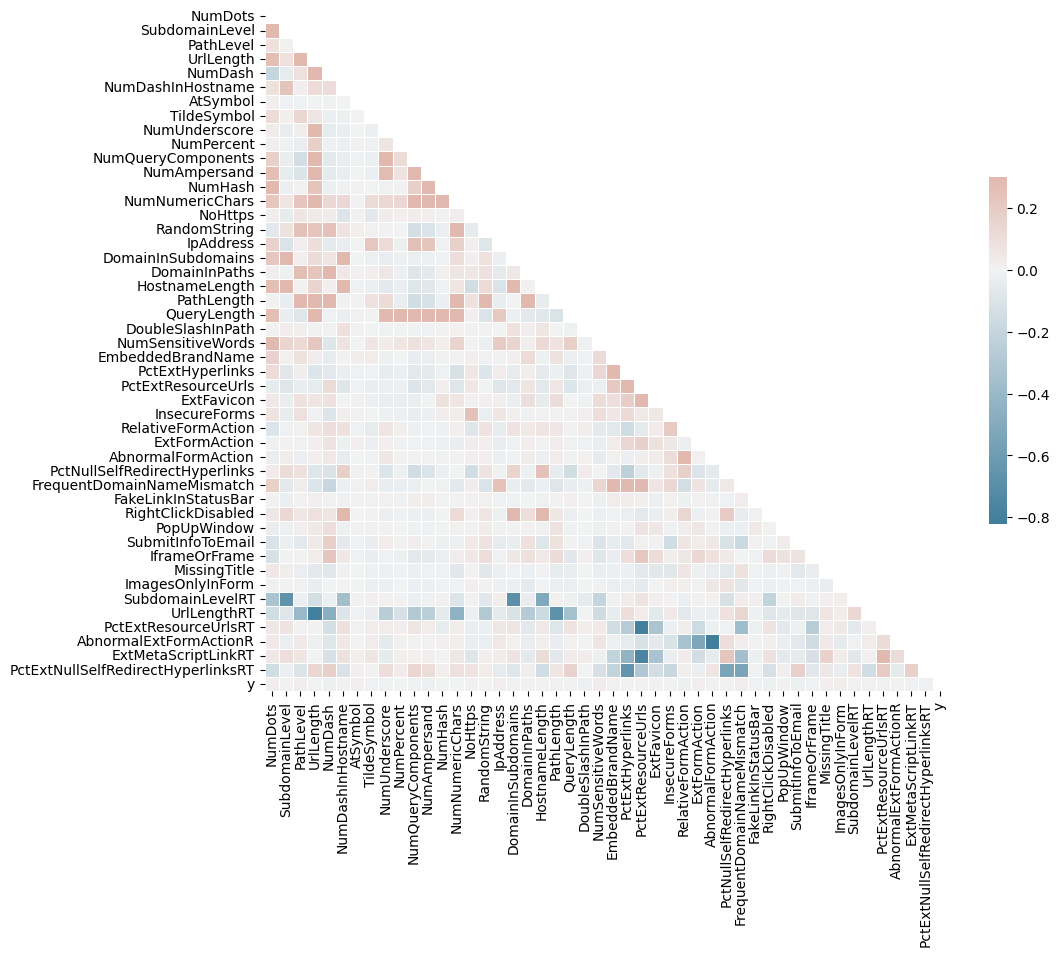

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
corr = corr_mat

mask = np.triu(np.ones_like(corr, dtype=bool))


f, ax = plt.subplots(figsize=(11, 9))


cmap = sns.diverging_palette(230, 20, as_cmap=True)


sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Visualização Ordenada dos paramêtros da matriz de correlação.

In [ ]:
corr_mat['y'].abs().sort_values(ascending=False)

y                                     1.000000
NumSensitiveWords                     0.029602
FrequentDomainNameMismatch            0.023002
NumDots                               0.021991
PathLevel                             0.021721
DoubleSlashInPath                     0.019353
ImagesOnlyInForm                      0.018772
SubmitInfoToEmail                     0.018073
NumDash                               0.017735
RelativeFormAction                    0.016794
RightClickDisabled                    0.016770
NumAmpersand                          0.015282
ExtFormAction                         0.014585
AtSymbol                              0.013727
DomainInSubdomains                    0.013329
NumQueryComponents                    0.012671
MissingTitle                          0.011760
IpAddress                             0.011285
AbnormalFormAction                    0.010932
PctExtResourceUrlsRT                  0.010493
ExtFavicon                            0.010268
NumUnderscore

#### Feito Ordenação dos índices do dataset, afim de verificar de forma decrescente as features mais importantes para o nosso treino.

In [ ]:
indice_ordenado_features = corr_mat['y'].abs().sort_values(ascending=False).index
indice_ordenado_features

Index(['y', 'NumSensitiveWords', 'FrequentDomainNameMismatch', 'NumDots',
       'PathLevel', 'DoubleSlashInPath', 'ImagesOnlyInForm',
       'SubmitInfoToEmail', 'NumDash', 'RelativeFormAction',
       'RightClickDisabled', 'NumAmpersand', 'ExtFormAction', 'AtSymbol',
       'DomainInSubdomains', 'NumQueryComponents', 'MissingTitle', 'IpAddress',
       'AbnormalFormAction', 'PctExtResourceUrlsRT', 'ExtFavicon',
       'NumUnderscore', 'PathLength', 'IframeOrFrame', 'TildeSymbol',
       'UrlLengthRT', 'NoHttps', 'PctExtNullSelfRedirectHyperlinksRT',
       'EmbeddedBrandName', 'ExtMetaScriptLinkRT', 'FakeLinkInStatusBar',
       'SubdomainLevelRT', 'PctExtHyperlinks', 'QueryLength',
       'PctExtResourceUrls', 'NumHash', 'UrlLength', 'HostnameLength',
       'NumPercent', 'RandomString', 'NumNumericChars', 'InsecureForms',
       'SubdomainLevel', 'NumDashInHostname', 'DomainInPaths',
       'PctNullSelfRedirectHyperlinks', 'AbnormalExtFormActionR',
       'PopUpWindow'],
      dtyp

#### Função para learning_curve: utilizamos o f1_score por questão da decicion tree ser de classificação. Dessa forma, acompanharemos todo o processo do f1_score a partir do aumento de uso de features no treinamento e no teste, a fim de verificar se há ou não overfitting do modelo.

In [ ]:
#Função para learning_curve, utilizamos o f1 por questão da decicion tree 
def aprendizado_selecao_feature(range_features, indice_ordenado_features, df_selecao, df_selecao_test, y_train, y_test):
    F1_train = []
    F1_test = []
    for limite_feature in range_features:
        modelo2 = DecisionTreeClassifier(random_state=43, max_depth=3)

        X_train_temp = df_selecao[indice_ordenado_features[1:limite_feature]]
        X_test_temp = df_selecao_test[indice_ordenado_features[1:limite_feature]]

        modelo.fit(X_train_temp, y_train)

        y_pred_train = modelo.predict(X_train_temp)
        y_pred_test = modelo.predict(X_test_temp)

        F1_train.append(f1_score(y_train, y_pred_train))
        F1_test.append(f1_score(y_test, y_pred_test))
        
    return range_features, F1_train, F1_test

#### Fazendo a chamada da função.

In [ ]:
range_features, F1_train, F1_test = aprendizado_selecao_feature(list(range(2, 37)), indice_ordenado_features, df_selecao, df_selecao_test, y_train, y_test)

#### Plotando a learning curve.

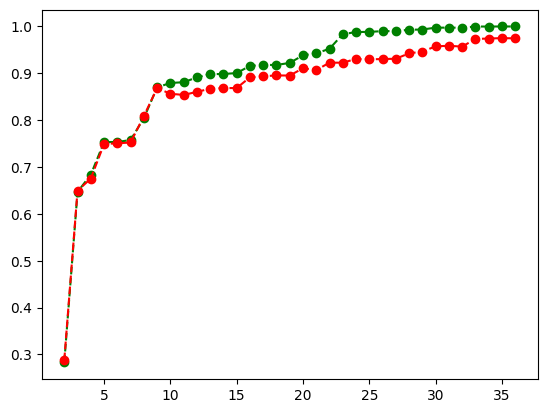

In [ ]:
#Learning_curve_plotado
plt.plot(range_features, F1_train, 'o--', color='g')
plt.plot(range_features, F1_test, 'o--', color='r')

#### Predição do modelo.

In [ ]:
#fit do modelo
y_pred2 = modelo2.predict(X_test2)
print(classification_report(y_test2, y_pred2))


              precision    recall  f1-score   support

           0       0.96      0.93      0.95       978
           1       0.94      0.97      0.95      1022

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000

